In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
git_url = 'https://raw.githubusercontent.com/Ftagliavini/DataScience/main/titles.csv?token=GHSAT0AAAAAACCBTXYZKO2TYWXHVMM5XNYCZCONI5A'
titulos_nfx = pd.read_csv(git_url, sep = ',')

In [5]:
titulos_nfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

In [6]:
titulos_nfx.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,6137.000000,6137.000000,2306.000000,5669.000000,5.653000e+03,6061.000000,5885.000000
mean,2017.371843,76.381946,2.106678,6.540942,2.115029e+04,19.267196,6.633194
std,6.603620,39.086828,2.716844,1.135944,9.254225e+04,51.291407,1.251610
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2017.000000,44.000000,1.000000,5.800000,5.170000e+02,3.381000,6.000000
50%,2019.000000,80.000000,1.000000,6.600000,2.095000e+03,7.580000,6.791000
75%,2021.000000,105.000000,2.000000,7.300000,8.884000e+03,16.523000,7.400000
max,2023.000000,225.000000,44.000000,9.600000,2.684317e+06,1078.637000,10.000000


In [7]:
titulos_nfx['type'].describe()

count      6137
unique        2
top       MOVIE
freq       3831
Name: type, dtype: object

In [8]:
titulos_nfx['genres'].describe()

count           6137
unique          1712
top       ['comedy']
freq             516
Name: genres, dtype: object

In [9]:
titulos_nfx['age_certification'].describe()

count      3394
unique       12
top       TV-MA
freq       1018
Name: age_certification, dtype: object

In [10]:
titulos_nfx['production_countries'].describe()

count       6137
unique       438
top       ['US']
freq        1981
Name: production_countries, dtype: object

#etiquetar ejes
    ax.set_xlabel
    ax.set_ylabel
#agregar título al gráfico
    ax.set_title
#agregar una leyenda
    ax.legend
#definir límites
    ax.set_xlimit
    ax.set_ylimit
#agregar una línea vertical
    ax.axvline
#agregar una línea horizontal
    ax-axhline
#lista de parametrizaciones
    mpl.rcParams.keys()

# Gráficar proporción de mercado entre series y películas

In [11]:
tipos = titulos_nfx['type'].value_counts()
print(tipos)

MOVIE    3831
SHOW     2306
Name: type, dtype: int64


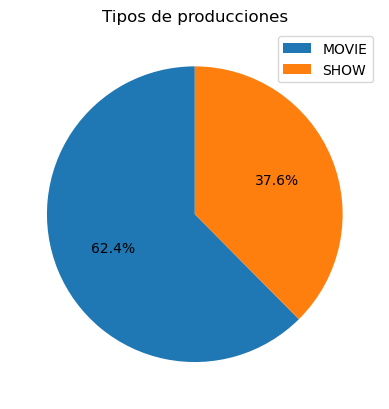

In [12]:
fig, ax = plt.subplots()
ax.pie(tipos,autopct = '%1.1f%%',startangle=90)
ax.set_title('Tipos de producciones')
ax.legend(tipos.index)

Observamos del total del universo que conforma el dataset, cuantas producciones son del tipo MOVIE y cuantas corresponde a SHOW 

# # Graficar línea de tiempo de producciones

In [13]:
tipos = titulos_nfx[['release_year','type']]
tipos

,release_year,type
0,1945,SHOW
1,1976,MOVIE
2,1978,MOVIE
3,1973,MOVIE
4,1979,MOVIE
...,...,...
6132,2023,MOVIE
6133,2023,MOVIE
6134,2023,MOVIE
6135,2023,MOVIE


In [14]:
x = tipos['release_year'].unique()
y_movie = tipos[tipos['type'] == 'MOVIE']
y_show = tipos[tipos['type'] == 'SHOW']
#print(y_show.isnull().sum())
#print(y_movie.isnull().sum())


In [15]:
y_movie_grouped_year = y_movie.groupby('release_year').count()
#y_movie_grouped_year

Text(0.5, 1.0, 'Simple Plot')

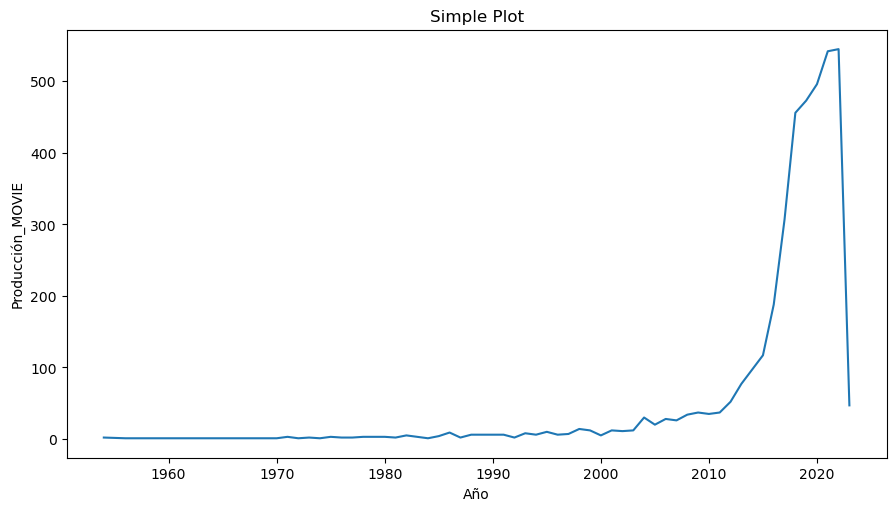

In [16]:
plt.figure(figsize=(8.85, 5), layout='constrained')
plt.plot(y_movie_grouped_year, label='linear')  # Plot some data on the (implicit) axes.
plt.xlabel('Año')
plt.ylabel('Producción_MOVIE')
plt.title("Simple Plot")

In [17]:
y_show_grouped_year = y_show.groupby('release_year').count()
#y_show_grouped_year

Text(0.5, 1.0, 'Simple Plot')

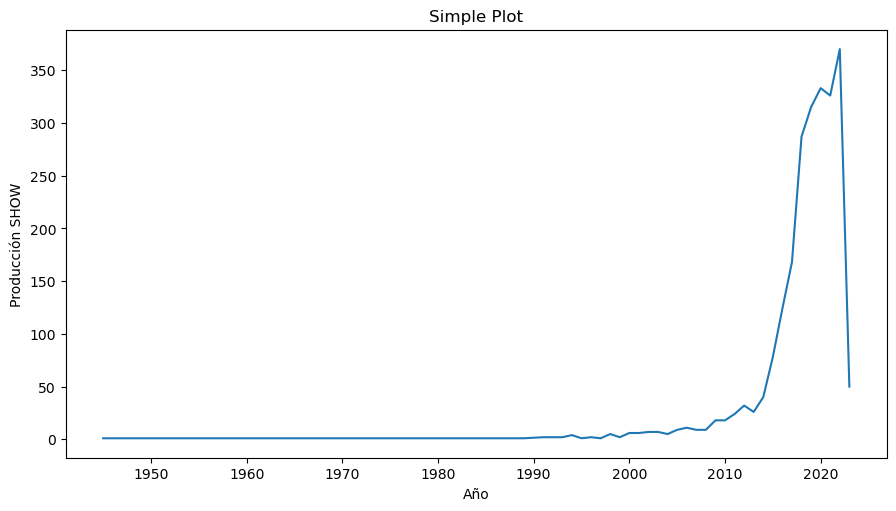

In [18]:
plt.figure(figsize=(8.85, 5), layout='constrained')
plt.plot(y_show_grouped_year, label='linear')  # Plot some data on the (implicit) axes.
plt.xlabel('Año')
plt.ylabel('Producción SHOW')
plt.title("Simple Plot")

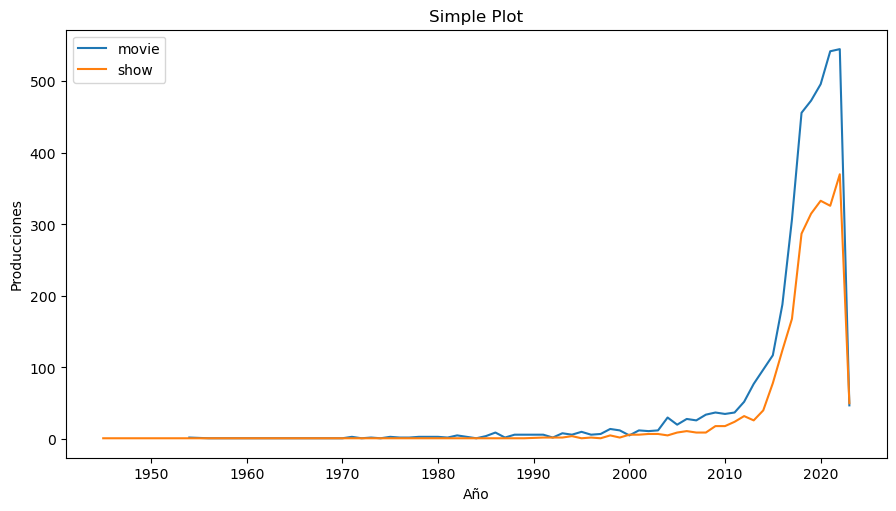

In [19]:
plt.figure(figsize=(8.85, 5), layout='constrained')
plt.plot(y_movie_grouped_year, label='movie')
plt.plot(y_show_grouped_year, label='show')
plt.xlabel('Año')
plt.ylabel('Producciones')
plt.title("Simple Plot")
plt.legend()

A partir del 2010 vemos un increménto muy fuerte de la producción de contenidos, tanto en MOVIE como en SHOW

# #Gráfica asociada a una distribución de rangos etarios - clasificación

In [20]:
titulos_nfx['age_certification'].unique()

array(['TV-MA', 'PG', 'R', 'TV-14', nan, 'TV-PG', 'PG-13', 'TV-Y',
       'TV-Y7', 'TV-G', 'G', 'NC-17', 'TV-Y7-FV'], dtype=object)

In [21]:
certificacion = titulos_nfx.groupby('age_certification').count()
certificacion = certificacion['id']
categorias = titulos_nfx['age_certification'].unique()
certificacion

age_certification
G            130
NC-17         11
PG           253
PG-13        449
R            505
TV-14        493
TV-G          85
TV-MA       1018
TV-PG        208
TV-Y         108
TV-Y7        127
TV-Y7-FV       7
Name: id, dtype: int64

Text(0.5, 1.0, 'Gráfico producción por categorías')

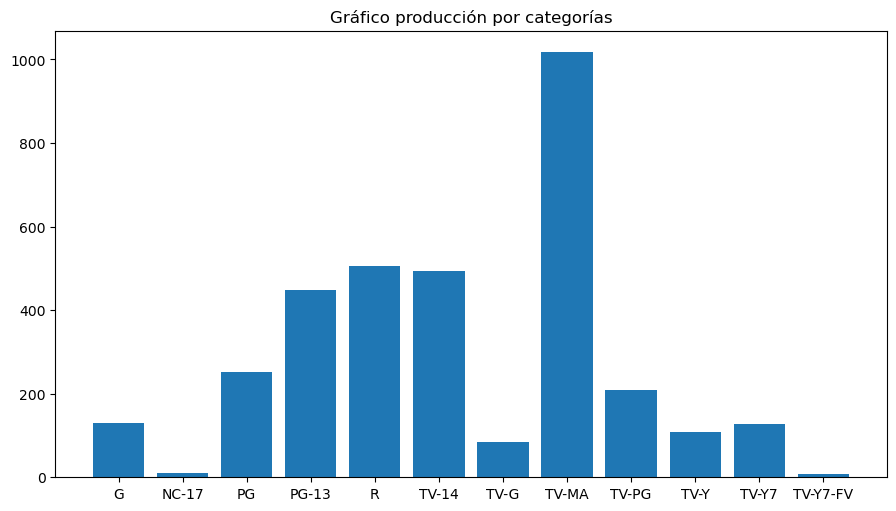

In [22]:
plt.figure(figsize=(8.85, 5), layout='constrained')
plt.bar(certificacion.index,certificacion)
plt.title("Gráfico producción por categorías")

In [23]:
top10= certificacion.nlargest(n=10)

Text(0.5, 1.0, 'Top10 producción por categorías')

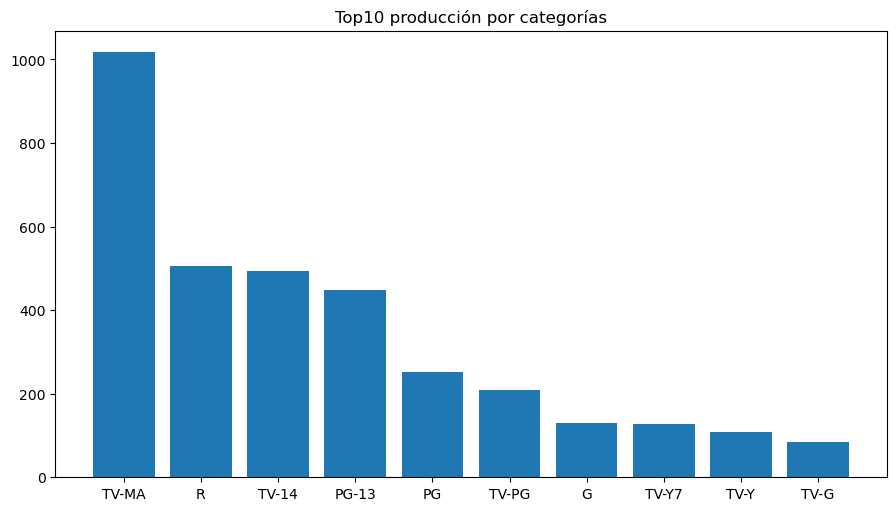

In [24]:
plt.figure(figsize=(8.85, 5), layout='constrained')
plt.bar(top10.index,top10)
plt.title("Top10 producción por categorías")

La mayor cantidad de películas que se producen son de contenido catalogado para adultos (TV-MA y R)

# #Grafica de relación entre puntuaciones imdb vs tmdb

In [25]:
#imdb_scores
#tmdb_scores
calificaciones = titulos_nfx[['imdb_score','tmdb_score','release_year']]
print(calificaciones.head(5))

   imdb_score  tmdb_score  release_year
0         NaN         NaN          1945
1         8.1       7.782          1976
2         7.2       7.406          1978
3         8.3       8.020          1973
4         7.3       7.246          1979


In [26]:
print(calificaciones['imdb_score'].isnull().sum())
print(calificaciones['imdb_score'].isna().sum())
print(calificaciones['imdb_score'].size)
print(calificaciones['imdb_score'].dtype)

468
468
6137
float64


In [27]:
print(calificaciones['tmdb_score'].isnull().sum())
print(calificaciones['tmdb_score'].isna().sum())
print(calificaciones['tmdb_score'].size)
print(calificaciones['tmdb_score'].dtype)

252
252
6137
float64


In [28]:
calificaciones.describe()

,imdb_score,tmdb_score,release_year
count,5669.000000,5885.000000,6137.000000
mean,6.540942,6.633194,2017.371843
std,1.135944,1.251610,6.603620
min,1.500000,0.500000,1945.000000
25%,5.800000,6.000000,2017.000000
50%,6.600000,6.791000,2019.000000
75%,7.300000,7.400000,2021.000000
max,9.600000,10.000000,2023.000000


Para poder comparar ambas clasificaciones primero vemos que tenemos campos NaN
Acá tenemos las sigiuentes opciones:
    + Eliminar/descartar esos registros (reducimos la muestra)
    + Valores de tendendecia central
        + Completar esos campos con el Media (concentrar la muestra, modificamos el valor de desvío estandar)
        + Completar esos campos con la moda
        + Completar esos campos con la Mediana
    + Agregar valores de una distribución uniforme (no modifica la distribucion de la muestra)   
     

In [29]:
#elimino los NaN
calificaciones_short=calificaciones.dropna(axis=0).reset_index(drop=True)
print(calificaciones_short.describe())
print(calificaciones_short.isna().sum())
#comparamos si se corren las distribuciones [media, mediana, desvío]

        imdb_score   tmdb_score  release_year
count  5487.000000  5487.000000   5487.000000
mean      6.545544     6.653635   2017.228540
std       1.128107     1.206431      6.751425
min       1.500000     1.000000   1954.000000
25%       5.900000     6.000000   2017.000000
50%       6.600000     6.800000   2019.000000
75%       7.300000     7.400000   2021.000000
max       9.600000    10.000000   2023.000000
imdb_score      0
tmdb_score      0
release_year    0
dtype: int64


In [30]:
#Reemplazo los NaN con el valor de la Media
calificaciones_media=calificaciones.fillna(calificaciones.mean()['imdb_score':'tmdb_score'])
print(calificaciones_media.describe())
print(calificaciones_media.isna().sum())
#comparamos si se corren las distribuciones [media, mediana, desvío]

        imdb_score   tmdb_score  release_year
count  6137.000000  6137.000000   6137.000000
mean      6.540942     6.633194   2017.371843
std       1.091765     1.225639      6.603620
min       1.500000     0.500000   1945.000000
25%       5.900000     6.036000   2017.000000
50%       6.540942     6.700000   2019.000000
75%       7.300000     7.400000   2021.000000
max       9.600000    10.000000   2023.000000
imdb_score      0
tmdb_score      0
release_year    0
dtype: int64


# Distribución de calificacion

In [47]:
calificaciones.head(5)

,imdb_score,tmdb_score,release_year
0,NaN,NaN,1945
1,8.1,7.782,1976
2,7.2,7.406,1978
3,8.3,8.020,1973
4,7.3,7.246,1979


In [48]:
calificaciones=calificaciones.set_index('release_year')
calificaciones

,imdb_score,tmdb_score
release_year,,
1945,NaN,NaN
1976,8.1,7.782
1978,7.2,7.406
1973,8.3,8.020
1979,7.3,7.246
...,...,...
2023,NaN,2.000
2023,7.9,7.200
2023,6.1,NaN


In [59]:
calificaciones_short=calificaciones_short.set_index('release_year')
calificaciones_short

,imdb_score,tmdb_score
release_year,,
1976,8.1,7.782
1978,7.2,7.406
1973,8.3,8.020
1979,7.3,7.246
1975,8.2,7.804
...,...,...
2023,7.5,3.800
2023,8.4,7.000
2023,5.9,2.000


In [80]:
calificaciones_media=calificaciones_media.set_index('release_year')
calificaciones_media

,imdb_score,tmdb_score
release_year,,
1945,6.540942,6.633194
1954,7.450000,7.032500
1956,6.700000,5.556000
1958,7.500000,7.400000
1962,6.900000,5.800000
...,...,...
2019,6.600000,6.800000
2020,6.540942,6.800000
2021,6.540942,6.671500


In [49]:
sns.set_theme(style="darkgrid")

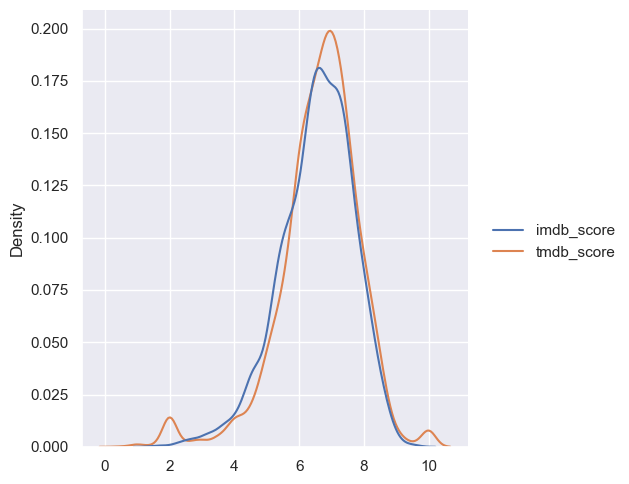

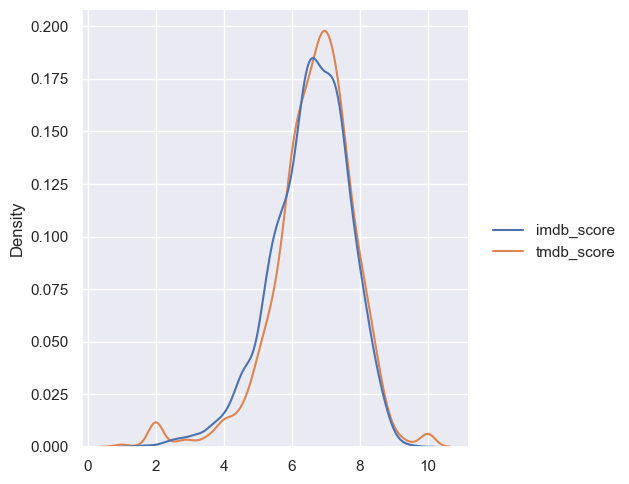

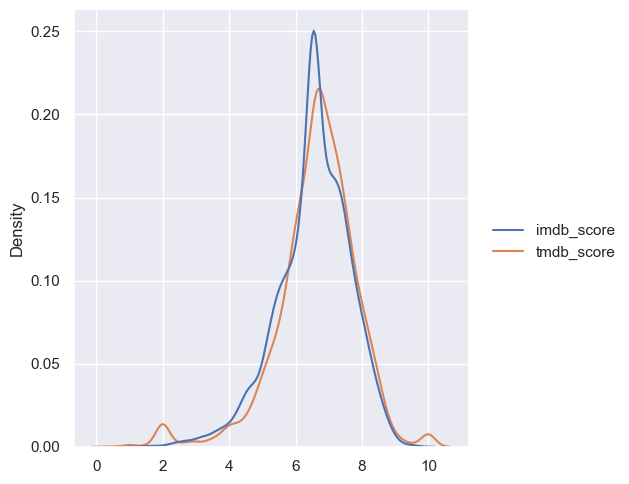

In [61]:
sns.displot(data=calificaciones,kind='kde')
sns.displot(data=calificaciones_short,kind='kde')
sns.displot(data=calificaciones_media,kind='kde')

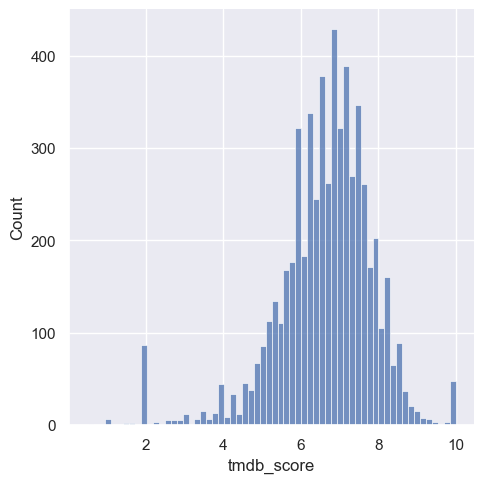

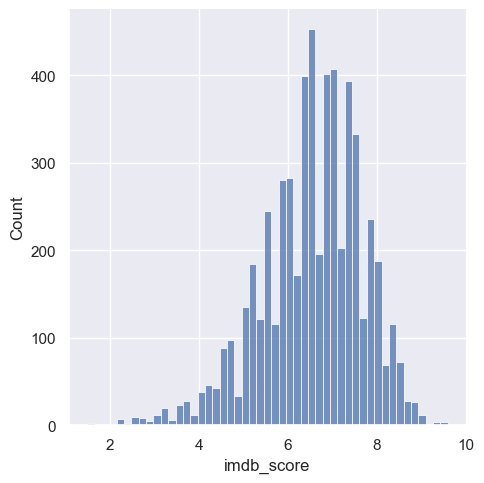

In [55]:
sns.displot(calificaciones['tmdb_score'])
sns.displot(calificaciones['imdb_score'])

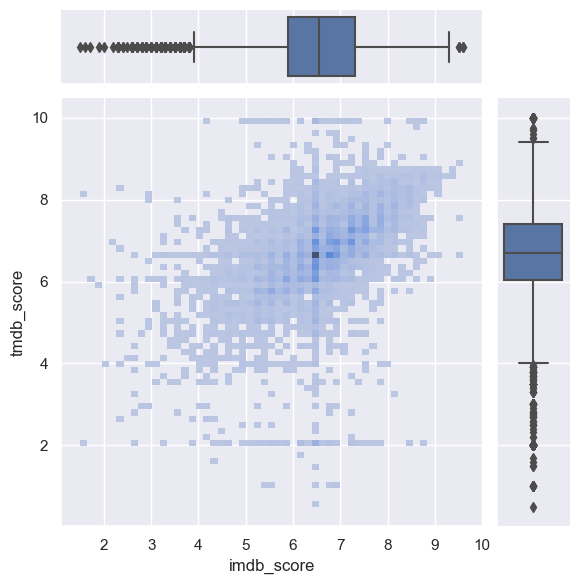

In [44]:
g = sns.JointGrid(x=calificaciones['imdb_score'],y=calificaciones['tmdb_score'])
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

Vemos varios outliers en ambas variables
los valores de midiana está bastante centrado entre los quartiles

# # Reviso Correlación entre ambas columnas de calificación

In [35]:
col1 = calificaciones['imdb_score']
col2 = calificaciones['tmdb_score']

corr = col1.corr(col2)

print ("Correlation between imdb and tmbd, is: ", round(corr, 2))


Correlation between imdb and tmbd, is:  0.48


Una empresa productora de películas y series, requiere conocer de forma anticipada que tipo de puntuación puede recibir un nuevo producto que esta por salir al mercado.

La fuente de datos es secundaria, extraida el dataset de la plataforma Netflix

Se dispone las votaciones realizadas por usuario de IMDb y TMdb

[SUPERVISADO - dispongo de datos históricos anteriores]

Se pudo observar que la correlación entre ambos es de 0,48 no es tan evidente el traslado entre ambas variables por tal motivo se considera que nutren ambas variables al modelo

También se observa que mas mayores votaciones se dieron en películas más recientes. Esto podría analizar reducir el data set asociado a películas antiguas, pero afecta el story telling. Nos quedamos con poca historia.

Tambien observamos que la producción creció exponencialmente en los últimos años, esto también podría aportar algo más de peso a intentar eliminar del data set películas antiguas..
